In [3]:
import torch 

import os
from torch.autograd import Variable

import numpy as np
import torch.optim as optim
#from kcrf.estimator import simple_estimator as np_simple_est
import time 
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.cm as cm
import matplotlib.animation as animation
import pickle
%matplotlib inline
import seaborn as sns
sns.set(context='paper', style='whitegrid', font_scale=1.75)
sns.set_style("whitegrid", {'axes.grid' : False})
from copy import deepcopy
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches
from matplotlib import pyplot


cwd = os.getcwd()
if  os.path.basename(os.path.normpath(cwd))=='notebooks':
    os.chdir("../")

from helpers import load_dictionary

In [4]:
dirname = 'figures/'
#os.makedirs(dirname, exist_ok=True)
save_figs = True
def save(n, ext='.pdf', save_figs=True, **kwargs):
    if save_figs==True:
        kwargs.setdefault('bbox_inches', 'tight')
        kwargs.setdefault('pad_inches', 0)
        kwargs.setdefault('transparent', True)
        plt.savefig(os.path.join(dirname, n + ext), **kwargs)

In [10]:
root = '/nfs/gatsbystor/michaela/projects/kale/exp/neurips'
path = 'sampling_cifar10/sample/samples_263754_/'
file_name = 'stats_seed_0.json'
full_path = os.path.join(root, path, file_name)
out_dic = load_dictionary(full_path)


In [12]:
out_dic.keys()

dict_keys(['fid_train', 'fid_test', 'index', 'path_arrays'])

# Plotting FID

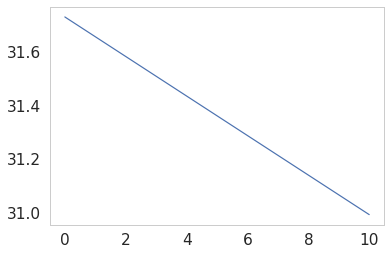

In [13]:
plt.plot( out_dic['index'], out_dic['fid_train'])

In [17]:
paths_to_arrays = out_dic['path_arrays']
images = []
latents = []
for path in paths_to_arrays:
    array_dic =  np.load(path+'.npz')
    images.append(array_dic['images'])
    latents.append(array_dic['latents'])



In [18]:
images = np.stack(images, axis=0)
latents = np.stack(latents, axis=0)